In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Data Loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# 2. Define Network Architecture with Hidden Layer
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNet, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten input
        x = self.fc1(x)  # First layer
        x = self.sigmoid(x)  # Sigmoid activation
        x = self.fc2(x)  # Output layer
        return x

# Model parameters
input_size = 3 * 32 * 32  # CIFAR-10 image size (flattened)
hidden_size = 100  # Hidden layer size
output_size = 10  # Number of classes

# Instantiate model, loss function, and optimizer
model = SimpleNet(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.0005)  # Weight decay for L2 regularization


In [4]:
# 3. Training Loop
num_epochs = 10
loss_history = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        running_loss += loss.item()

    # Average loss for the epoch
    epoch_loss = running_loss / len(trainloader)
    loss_history.append(epoch_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/10, Loss: 2.0770
Epoch 2/10, Loss: 1.9102
Epoch 3/10, Loss: 1.8502
Epoch 4/10, Loss: 1.8125
Epoch 5/10, Loss: 1.7835
Epoch 6/10, Loss: 1.7610
Epoch 7/10, Loss: 1.7427
Epoch 8/10, Loss: 1.7275
Epoch 9/10, Loss: 1.7143
Epoch 10/10, Loss: 1.7024


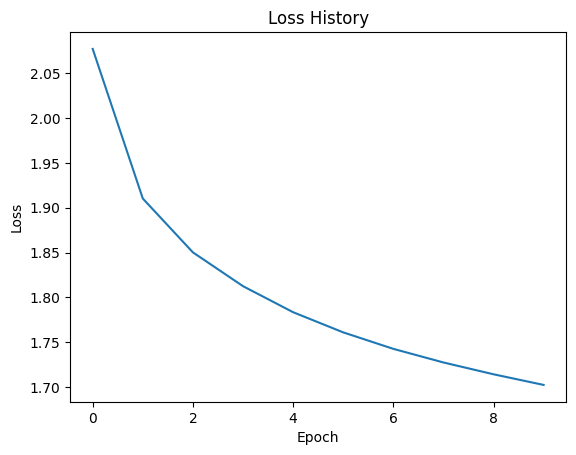

In [5]:
# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [6]:
# 5. Calculate Training Accuracy
correct_train = 0
total_train = 0
with torch.no_grad():
    for inputs, labels in trainloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training Accuracy: {train_acc:.2f}%")

Training Accuracy: 41.29%


In [7]:
# 6. Calculate Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test Accuracy: {test_acc:.2f}%")

Test Accuracy: 40.61%


Task 2...............................

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalization for grayscale images
])
batch_size = 64
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)


In [9]:
# 2. Define LeNet-5 Network
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)  # Input: 1x28x28, Output: 6x24x24
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)  # Input: 6x12x12, Output: 16x8x8
        
        # Fully connected layers
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # 16 feature maps of 4x4 size after pooling
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # 10 output classes for digits 0-9

        # Pooling layer
        self.pool = nn.AvgPool2d(2, 2)  # 2x2 average pooling

    def forward(self, x):
        # Pass through convolutional layers with activation and pooling
        x = self.pool(torch.relu(self.conv1(x)))  # Input: 1x28x28, Output: 6x12x12
        x = self.pool(torch.relu(self.conv2(x)))  # Input: 6x12x12, Output: 16x4x4
        
        # Flatten for fully connected layers
        x = x.view(-1, 16 * 4 * 4)  # Flatten to 256 features
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate model, loss function, and optimizer
model = LeNet5()
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [10]:
# 3. Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()  # Zero gradients
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        running_loss += loss.item()

    # Print average loss per epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(trainloader):.4f}")


Epoch 1/10, Loss: 0.3158
Epoch 2/10, Loss: 0.0878
Epoch 3/10, Loss: 0.0596
Epoch 4/10, Loss: 0.0470
Epoch 5/10, Loss: 0.0383
Epoch 6/10, Loss: 0.0331
Epoch 7/10, Loss: 0.0297
Epoch 8/10, Loss: 0.0254
Epoch 9/10, Loss: 0.0233
Epoch 10/10, Loss: 0.0200


In [12]:
# 4. Calculate Training Accuracy
correct_train = 0
total_train = 0
with torch.no_grad():
    for inputs, labels in trainloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training Accuracy: {train_acc:.2f}%")

Training Accuracy: 99.30%


Task 3 ..................